# Chapter 14
@ Imran Ahmad

## Using Lime

If using for the first time, install lime first.

In [1]:
!pip install lime

 Import the necessary packages

In [2]:
import sklearn 
import pickle
import numpy as np
from lime.lime_tabular import LimeTabularExplainer as ex

In [3]:
pkl_file = open("housing.pkl","rb")
housing = pickle.load(pkl_file)
pkl_file.close()
housing['feature_names']

array(['crime_per_capita', 'zoning_prop', 'industrial_prop',
       'nitrogen_oxide', 'number_of_rooms', 'old_home_prop',
       'distance_from_city_center', 'high_way_access',
       'property_tax_rate', 'pupil_teacher_ratio', 'low_income_prop',
       'lower_status_prop', 'median_price_in_area'], dtype='<U25')

In [4]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    housing.data, housing.target)

regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [5]:
cat_col = [i for i, col in enumerate(housing.data.T)
                        if np.unique(col).size < 10]

In [6]:
myexplainer = ex(X_train,
    feature_names=housing.feature_names,
    class_names=['price'],
    categorical_features=cat_col,
    mode='regression')

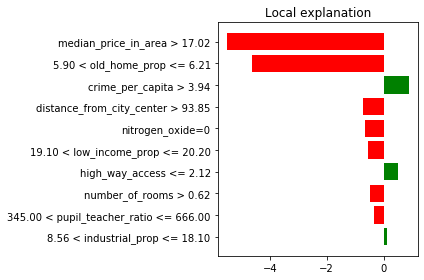

In [7]:
# Now explain a prediction
exp = myexplainer.explain_instance(X_test[25], regressor.predict,
        num_features=10)

exp.as_pyplot_figure()
from matplotlib import pyplot as plt
plt.tight_layout()

In [8]:
print(exp.as_list())

[('median_price_in_area > 17.02', -5.508997676542485), ('5.90 < old_home_prop <= 6.21', -4.634621609922408), ('crime_per_capita > 3.94', 0.8712636112076941), ('distance_from_city_center > 93.85', -0.7136451730594977), ('nitrogen_oxide=0', -0.6718654244184805), ('19.10 < low_income_prop <= 20.20', -0.5603099180102011), ('high_way_access <= 2.12', 0.5048294460118219), ('number_of_rooms > 0.62', -0.47751823135549437), ('345.00 < pupil_teacher_ratio <= 666.00', -0.3553831711742218), ('8.56 < industrial_prop <= 18.10', 0.11670812245152862)]


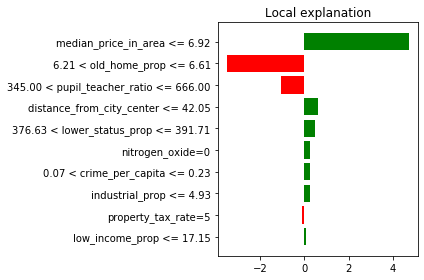

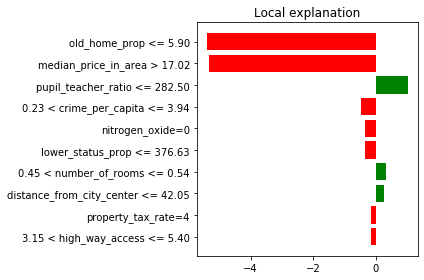

In [9]:
for i in [1, 35]:
    exp = myexplainer.explain_instance(X_test[i], regressor.predict,
            num_features=10)
    exp.as_pyplot_figure()
    plt.tight_layout()